In [2]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data
from functions.merged_dataset_creation import create_preprocessed_dataset
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


c:\Users\mohamed.fahmaoui\.virtualenvs\corporate_ghg_estimation-2wWrtO8D\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Parameters defintion

In [3]:
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'
# ,"CF3_log", "CF123_log"
targets = ["CF1_log","CF2_log"]
models = {
        # "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "low":0.01,
    "high":1,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "fill_grp":"",
    "old_pipe":False,  
    "cross_val": False,
}

Summary_Final=[]
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

## Train and save best models for proprietary data

In [4]:
Refinitiv_data, CarbonPricing, IncomeGroup, FuelIntensity, GICSReclass = load_data(path_rawdata) 
        
preprocessed_dataset = create_preprocessed_dataset(
    Refinitiv_data,
    GICSReclass,
    CarbonPricing,
    IncomeGroup,
    FuelIntensity) 

2023/04/28 17:15:45 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/04/28 17:15:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 3
Created version '3' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009921 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/04/28 17:15:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/04/28 17:16:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 2
Created version '2' of model 'lgbm'.


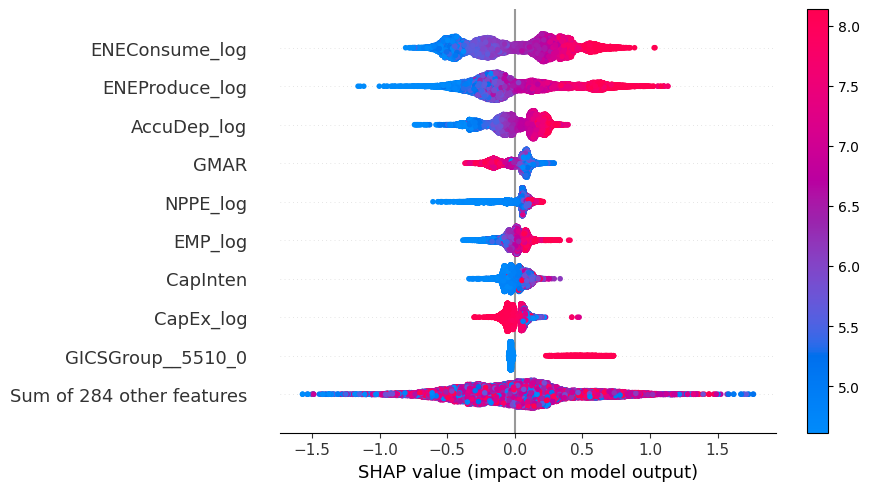

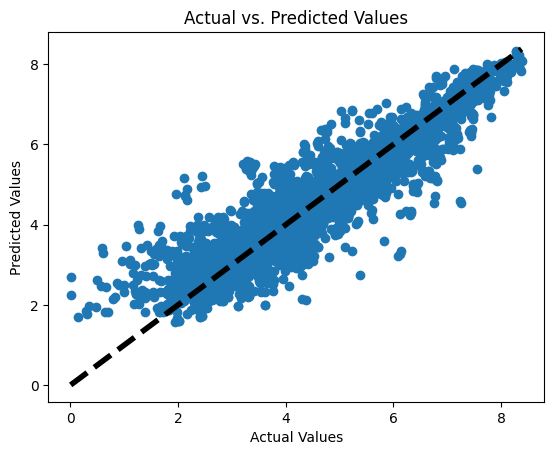

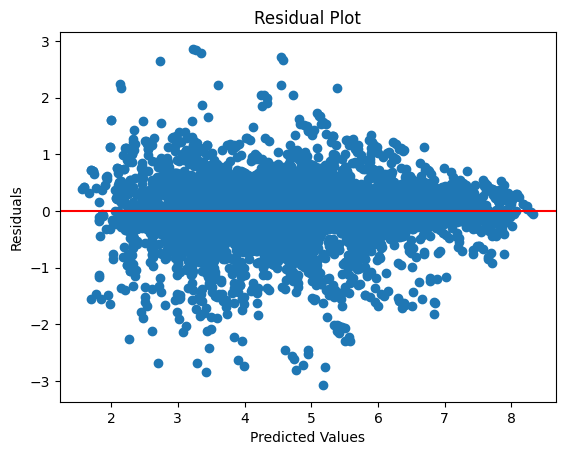

2023/04/28 17:21:45 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/04/28 17:22:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 4
Created version '4' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2023/04/28 17:22:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/04/28 17:22:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 3
Created version '3' of model 'lgbm'.


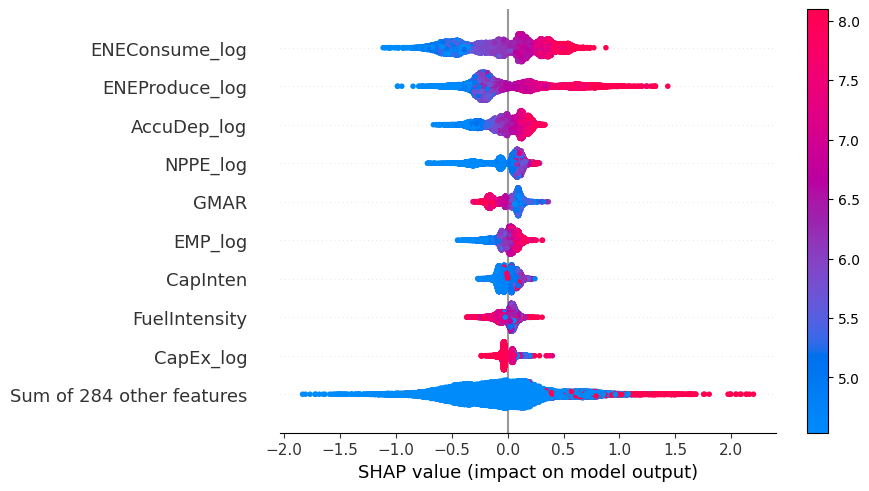

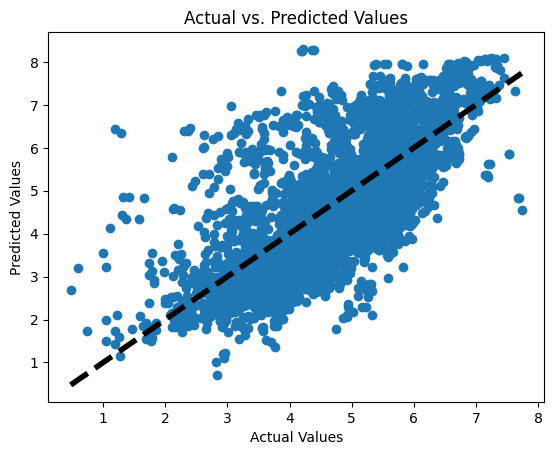

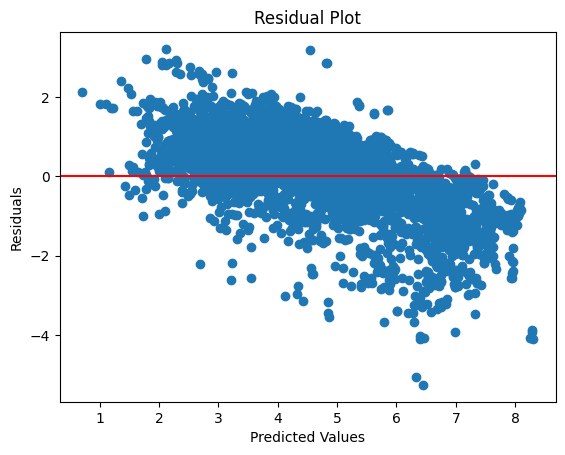

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 164.57it/s]


PermissionError: [Errno 13] Permission denied: 'results/proprietary_data/Summary_metrics_detail.csv'

In [5]:
summary_metrics_detailed = training_pipeline(
    name_experiment="best_models_on_proprietary_data_mohamed18",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=True,
    
)